## Simulating the SIR differential equations

$$ \frac{dS}{dt} =  - \beta S I $$

$$ \frac{dI}{dt}=\beta S I - \gamma I $$

$$ \frac{dR}{dt} = \gamma I$$

In [1]:
function d_ofS(β, S, I)
    
    d_ofs = -β*S*I
    return d_ofs
    
end 

function d_ofI(β, S, I, γ)
    
    d_ofi=β*S*I-γ*I
    return  d_ofi
    
end 

function d_ofR(γ, I)
    
    d_ofr=γ*I
    return d_ofr
    
end

function euler_SIR(β, γ, S0, I0, R0, h, T)
    
    S=Float64[]
    I=Float64[]
    R=Float64[]
    Times=Float64[]
    
    s=0
    i=0
    r=0
    
    for n in 0:T
        
        if(n==0)
            
            S_new= S0 + d_ofS(β, S0, I0)*h
            I_new= I0 + d_ofI(β, S0, I0, γ)*h
            R_new= R0 + d_ofR(γ, I0)*h
            
            s=S_new
            i=I_new
            r=R_new
            
            push!(S, S_new)
            push!(I, I_new)
            push!(R, R_new)
            push!(Times, n)
            
            continue
            
        end 
            
        S_new= s + d_ofS(β, s, i)*h
        I_new= i + d_ofI(β, s, i, γ)*h
        R_new= r + d_ofR(γ, i)*h
        
        s=S_new
        i=I_new
        r=R_new
        
        push!(S, S_new)
        push!(I, I_new)
        push!(R, R_new)
        push!(Times, n)

    end
    
    return S, I, R, Times
    
end

euler_SIR (generic function with 1 method)

In [2]:
sim=euler_SIR(0.1, 0.05, 0.99, 0.01, 0, 0.1, 3000)

([0.989901, 0.98980152484851, 0.9897015724124879, 0.9896011405507747, 0.989500227114079, 0.9893988299449603, 0.9892969468778136, 0.9891945757388533, 0.9890917143460979, 0.9889883605093545  …  0.2000141700516319, 0.20001266363524087, 0.20001116174919717, 0.20000966437986517, 0.20000817151365036, 0.20000668313699918, 0.20000519923639898, 0.20000371979837783, 0.20000224480950438, 0.20000077425638782], [0.010049, 0.01009823015149, 0.010147691436754711, 0.010197384841284065, 0.010247311353773344, 0.010297471966123151, 0.010347867673439268, 0.010398499474032362, 0.010449368369417561, 0.010500475364313885  …  0.0007531548343023925, 0.0007508954765219142, 0.0007486428851830126, 0.0007463970400891048, 0.0007441579211034827, 0.0007419255081491384, 0.000739699781208589, 0.0007374807203237036, 0.0007352683055955283, 0.0007330625171841146], [5.0e-5, 0.00010024500000000001, 0.00015073615075745004, 0.00020147460794122358, 0.0002524615321476439, 0.00030369808891651063, 0.0003551854487471264, 0.0004069

In [3]:
using Plots

In [4]:
p=plot();

In [5]:
S=sim[1];
I=sim[2];
R=sim[3];
T=sim[4];

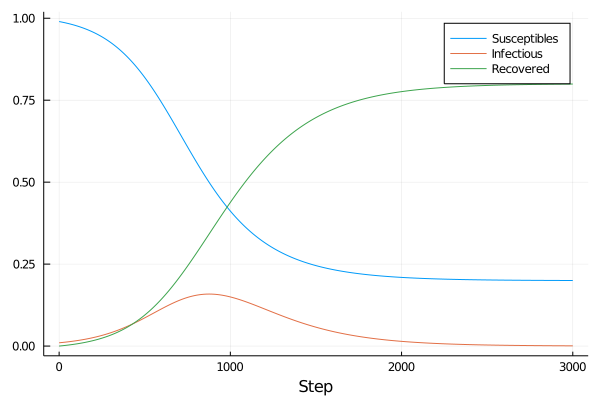

In [6]:
plot!(T, S, label="Susceptibles")
plot!(T, I, label="Infectious")
plot!(T, R, label="Recovered")

xlabel!("Step")


In [7]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11926363820956643876\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6622164403199813196\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11926363820956643876\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [8]:
@manipulate for γ in slider(0.01:0.001:0.5, label="γ")
    @manipulate for β in slider(0.01:0.001:0.5,  label="β")
    
        sim=euler_SIR(β, γ, 0.99, 0.01, 0, 0.1, 3000)
        
        S=sim[1];
        I=sim[2];
        R=sim[3];
        T=sim[4];
        
        p=plot();
        plot!(T, S, label="Susceptibles")
        plot!(T, I, label="Infectious")
        plot!(T, R, label="Recovered")

        xlabel!("Step")
        
    end

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["γ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 491,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
246, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000013fb85d0, Task (runnable) @0x0000000013fb85d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.01\",\"0.011\",\"0.012\",\"0.013\",\"0.014\",\"0.015\",\"0.016\",\"0.017\",\"0.018\",\"0.019\",\"0.02\",\"0.021\",\"0.022\",\"0.023\",\"0.024\",\"0.025\",\"0.026\",

## Numerical derivatives

In [56]:
function deriv(f::Function, a, h=0.001)

    f_a=(f(a+h)-f(a))/h
    return f_a
    
end

deriv (generic function with 4 methods)

In [78]:
function tangent_line(f::Function, a, x)
    
    t_l=(f(a)+deriv(f, a)*(x-a))
    return(x, t_l)
end

tangent_line (generic function with 2 methods)

In [81]:
my_function(x)=x^3 - 2*x

my_function (generic function with 1 method)

In [84]:
using Interact

In [89]:
@manipulate for a in slider(-10:0.1:10, value=0)
    
    pt_1=tangent_line(my_function, a, -10)
    pt_2=tangent_line(my_function, a, 10)
    tg=[pt_1, pt_2]
    
    p=plot()
    plot!(tg)
    plot!(-10:10, x -> x^3 - 2*x)
    ylims!(-1000, 1000)
    
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 201,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
101, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000028407990, Task (runnable) @0x0000000028407990), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-10.0\",\"-9.9\",\"-9.8\",\"-9.7\",\"-9.6\",\"-9.5\",\"-9.4\",\"-9.3\",\"-9.2\",\"-9.1\",\"-9.0\",\"-8.9\",\"-8.8\",\"-8.7\",\"-8.6\",\"-8.5\",\"-8.4\",\"-8.3\",\

In [ ]:
function 